In [1]:
#Import Dependencies 
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
#read Json file to a data frame
import json
a=json.dumps('combined_json_by_year.json')


In [3]:
df_full = pd.read_json('combined_json_by_year.json') 

In [4]:
df_full.columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64')

In [5]:
df_full.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
time,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
max,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
data,"[{'lat': -89, 'lon': -179, 'value': -1.3591666...","[{'lat': -89, 'lon': -179, 'value': -0.3866666...","[{'lat': -89, 'lon': -179, 'value': 1.61416664...","[{'lat': -89, 'lon': -179, 'value': -0.9783333...","[{'lat': -89, 'lon': -179, 'value': -0.1083332...","[{'lat': -89, 'lon': -179, 'value': 0.94249997...","[{'lat': -89, 'lon': -179, 'value': -0.6033333...","[{'lat': -89, 'lon': -179, 'value': -0.0683333...","[{'lat': -89, 'lon': -179, 'value': 0.32916666...","[{'lat': -89, 'lon': -179, 'value': 1.22499994...",...,"[{'lat': -89, 'lon': -179, 'value': 0.60416666...","[{'lat': -89, 'lon': -179, 'value': 0.21000000...","[{'lat': -89, 'lon': -179, 'value': 0.13416664...","[{'lat': -89, 'lon': -179, 'value': 0.90583334...","[{'lat': -89, 'lon': -179, 'value': 1.76333331...","[{'lat': -89, 'lon': -179, 'value': 0.55833332...","[{'lat': -89, 'lon': -179, 'value': 0.50499998...","[{'lat': -89, 'lon': -179, 'value': -1.3308333...","[{'lat': -89, 'lon': -179, 'value': -0.0583333...","[{'lat': -89, 'lon': -179, 'value': 0.29166664..."


In [6]:
df = df_full.T
df.head()

,time,max,data
2000,2000,6,"[{'lat': -89, 'lon': -179, 'value': -1.3591666..."
2001,2001,6,"[{'lat': -89, 'lon': -179, 'value': -0.3866666..."
2002,2002,6,"[{'lat': -89, 'lon': -179, 'value': 1.61416664..."
2003,2003,6,"[{'lat': -89, 'lon': -179, 'value': -0.9783333..."
2004,2004,6,"[{'lat': -89, 'lon': -179, 'value': -0.1083332..."


In [7]:

pd.json_normalize(df.iloc[0]['data'][0])

test = pd.DataFrame()
for i in range(len(df)):
    test = pd.concat([test, pd.json_normalize(df.iloc[i]['data'][11370])])

In [8]:
test

,lat,lon,value
0,37,-119,0.697500
0,37,-119,1.253333
0,37,-119,0.762500
0,37,-119,1.124167
0,37,-119,0.726667
0,37,-119,0.526667
0,37,-119,0.679167
0,37,-119,1.029167
0,37,-119,0.824167
0,37,-119,0.775000


In [9]:
test.insert(0,"Years", [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023], True)

test.head()

,Years,lat,lon,value
0,2000,37,-119,0.697500
0,2001,37,-119,1.253333
0,2002,37,-119,0.762500
0,2003,37,-119,1.124167
0,2004,37,-119,0.726667


In [10]:
Temps_df = test.reset_index()
Temps_df


,index,Years,lat,lon,value
0,0,2000,37,-119,0.697500
1,0,2001,37,-119,1.253333
2,0,2002,37,-119,0.762500
3,0,2003,37,-119,1.124167
4,0,2004,37,-119,0.726667
5,0,2005,37,-119,0.526667
6,0,2006,37,-119,0.679167
7,0,2007,37,-119,1.029167
8,0,2008,37,-119,0.824167
9,0,2009,37,-119,0.775000


In [11]:
del Temps_df['index']

In [12]:
Temps_df.dtypes

Years      int64
lat        int64
lon        int64
value    float64
dtype: object

In [13]:
Temps_df

,Years,lat,lon,value
0,2000,37,-119,0.697500
1,2001,37,-119,1.253333
2,2002,37,-119,0.762500
3,2003,37,-119,1.124167
4,2004,37,-119,0.726667
5,2005,37,-119,0.526667
6,2006,37,-119,0.679167
7,2007,37,-119,1.029167
8,2008,37,-119,0.824167
9,2009,37,-119,0.775000


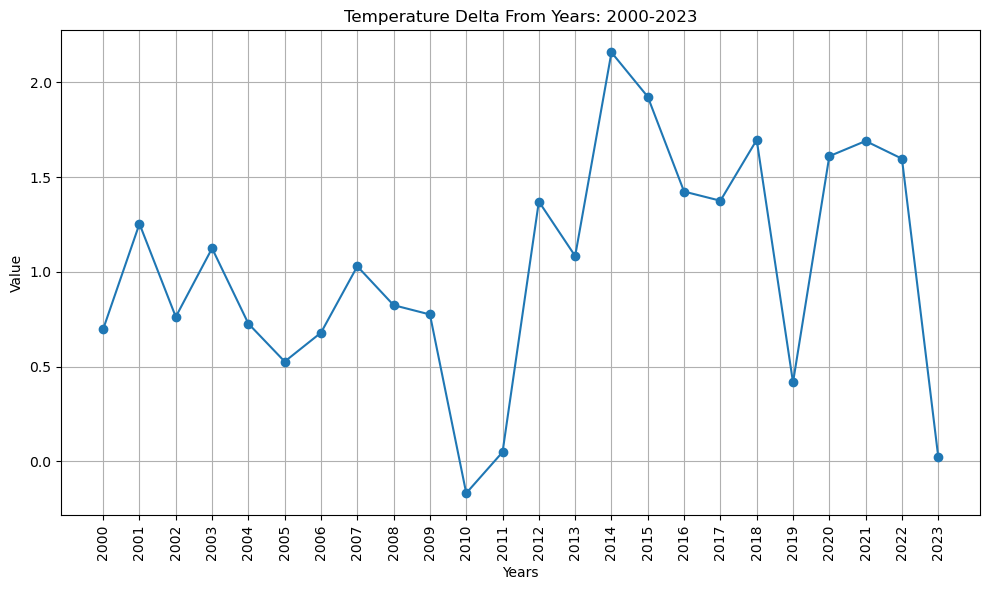

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(Temps_df['Years'], Temps_df['value'], marker='o')

plt.title('Temperature Delta From Years: 2000-2023')
plt.xlabel('Years')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(range(2000, 2024, 1))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

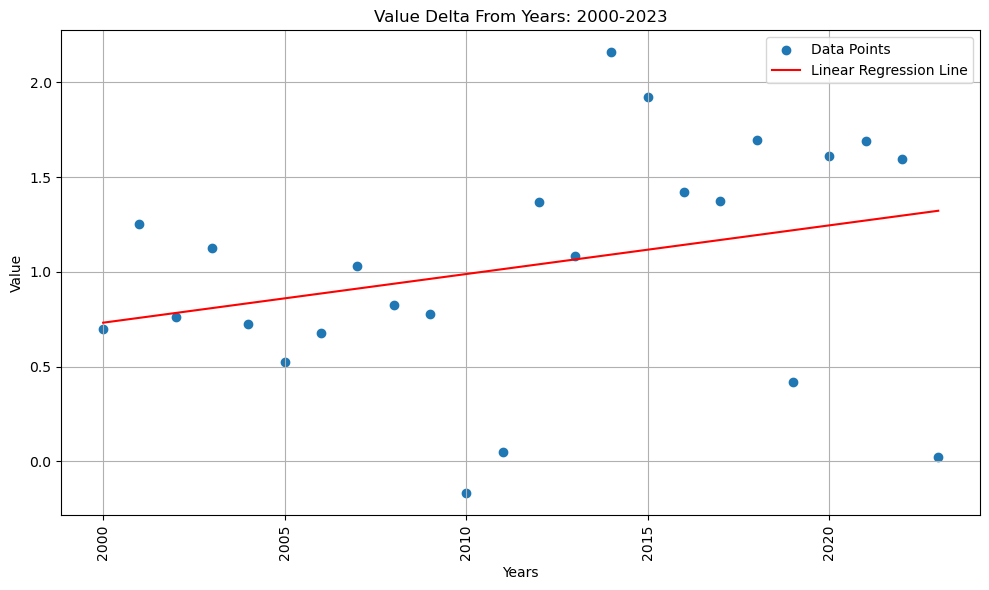

The r-squared is: 0.08811381346564989
y = 0.03x + -50.6


In [19]:
coefficients = np.polyfit(Temps_df['Years'], Temps_df['value'], 1)
poly = np.poly1d(coefficients)
x_values = Temps_df['Years']
y_values = poly(x_values)



# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(Temps_df['Years'], Temps_df['value'], label='Data Points')
plt.plot(x_values, y_values, color='red', linestyle='-', label='Linear Regression Line')
plt.title('Value Delta From Years: 2000-2023')
plt.xlabel('Years')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

The r-squared is: 0.08811381346564989
y = 0.03x + -50.6


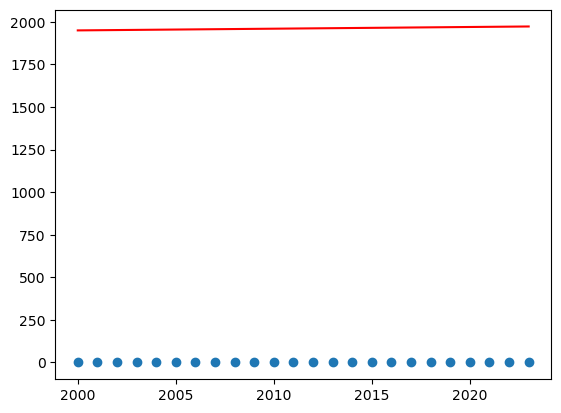

In [20]:
x_values = Temps_df["Years"]
y_values = Temps_df["value"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values + slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

In [17]:
# # split the dataframe
# objs = [df, pd.DataFrame(df['data'].tolist()).iloc[:, :3]]
# df2 = pd.concat(objs, axis=1).drop('data', axis=1)


In [18]:
# Function to extract information from the list of dictionaries
# def extract_info(row):
#     if isinstance(row, list):
#         return row[0]  # Assuming there's only one dictionary in each list element
#     else:
#         return {}

# # Apply the function to create new columns
# df_pull = pd.concat([df, df['data'].apply(pd.Series).apply(extract_info)], axis=1)

# # Drop the original list_col column
# df_pull.drop('data', axis=1, inplace=True)
1a
# print(df_pull)

SyntaxError: invalid decimal literal (1493053817.py, line 13)